
***
***

# R2.07
## TP5. Coloration
***
***

Le but de ce TP est d'implémenter la coloration naïve de graphe, puis de voir ses limites
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

On rappelle une fonction vue au TP 2

In [3]:
def neighbours(A,v):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param v: the considered vertex
    :type v: integer
    :return:  the array of (out-)neighbours of v in the graph whose adjacency matrix is A
    :rtype:  an array of integer
    """
    
    
        

    return np.where(A[v]==1)[0]




### Coloration Naïve
***
**To Do:**

**_question 1_**

**a**  Écrire une fonction revoyant le minimum des éléments d'une liste (triée) <tt> l1</tt> parmi les éléments n'appartenant pas à la liste  <tt> l2</tt>


**b**  Implémenter l'algorithme de coloration naïve de graphes

_On prendra un ordre aléatoire pour le traitement des sommets_





In [11]:
def MinCol(col,colneigh):
    """
     Return the minimum among col of element which do not belong to colneigh

    :param col,colneigh: colours
    :type col,colneigh: 2 one dimensional np array of int
    :return c:  minimal admissible colour
    :rtype:   int
    """
    
    for i in range(len(col)):
        
        if col[i] not in colneigh:
            
            return col[i]
    
    return -1

        
print(MinCol(np.arange(10),np.array([0,1,3])))

print(MinCol(np.arange(10),np.array([1,2])))

print(MinCol(np.arange(10),np.array([0,2])))


def NaiveCol(A):
    """
     Return a (naive, possibly sub-optimal) graph colouring of A

    :param A: adjacency matrix
    :type A: a two dimensional square numpy array 
    :return C:  array of colors
    :rtype:   one dimensional numpy array
    """
                
    colours = np.arange(A.shape[0]) #available colours

    C=-1*np.ones(A.shape[0],int) #colours array
    
    
    VerticesList = np.arange(A.shape[0])
    np.random.shuffle( VerticesList) #ordre aléatoire sur les sommets
    
    for v in VerticesList:
        
        colneigh = C[neighbours(A,v)]
        
        C[v] = MinCol(colours,colneigh)
        

    return C

                   




2
0
1


On teste avec un exemple simple, le cycle.

[0 1 0 1 2 0 2 1 0 1]


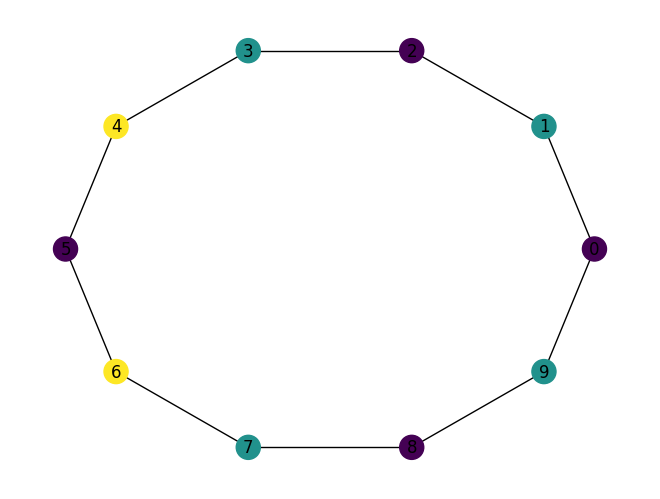

In [38]:
n=10
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)

C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))



Tester avec d'autres exemples classiques venant [du manuel de référence networkx](https://networkx.org/documentation/stable/reference/generators.html)

n =  4 
ok =  100.0 %

n =  6 
ok =  66.03999999999999 %

n =  8 
ok =  46.839999999999996 %

n =  10 
ok =  31.66 %

n =  12 
ok =  20.24 %

n =  14 
ok =  15.64 %

n =  16 
ok =  11.14 %

n =  18 
ok =  7.32 %

n =  20 
ok =  4.64 %



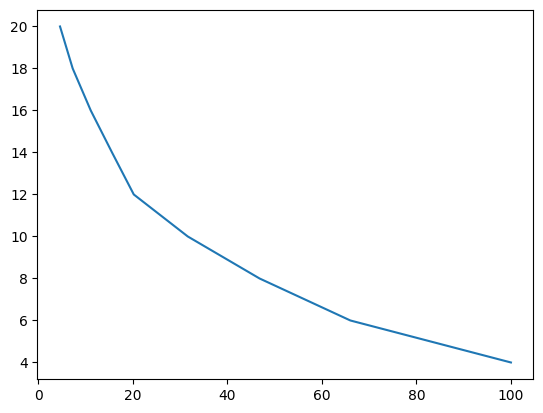

In [92]:
nb_essais = 5000

x = []

y = []

for i in range(4, 21, 2):
    
    ok = 0
    
    x.append(i)
    
    for j in range(nb_essais):
        
        G=nx.generators.classic.cycle_graph(i)
        
        A=nx.to_numpy_array(G)
        
        C=NaiveCol(A)
        
        if max(C) == 1:
            
            ok += 1
            
    result = (ok/nb_essais)*100
    
    y.append(result)
            
    print("n = ", i, "\nok = ", result,"%\n")
    
    ok = 0
    
plt.plot(y, x)
plt.show() 

Le but de cette question est d'estimer la qualité de cette algorithme.

On se concentre sur un cas particulier, le $2n$-cycle.


**_question 2_**

Quel est le nombre chromatique de $C_{2n}$ ?

Tester sur plusieurs essais le nombre de couleurs obtenues avec l'algorithme de coloration naïve. Qu'en pensez-vous ?


In [ ]:
"""
Au delà  de 6 sommets, les chances de trouver une coloration avec 2 couleurs sont très faibles.
"""

**question 3**

Tester le nombre de couleurs obtenu pour le coloriage naïf sur 5000 essais pour $C_{20}$. Pour quelle proportion est-ce optimal ? Tracer la courbe.

**question 4**

Tracer la proportion de coloriages naïf optimaux en fonction de la taille du cycle $C_{2n}$.

Même questions avec un graphe biparti aléatoire.

[1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0]


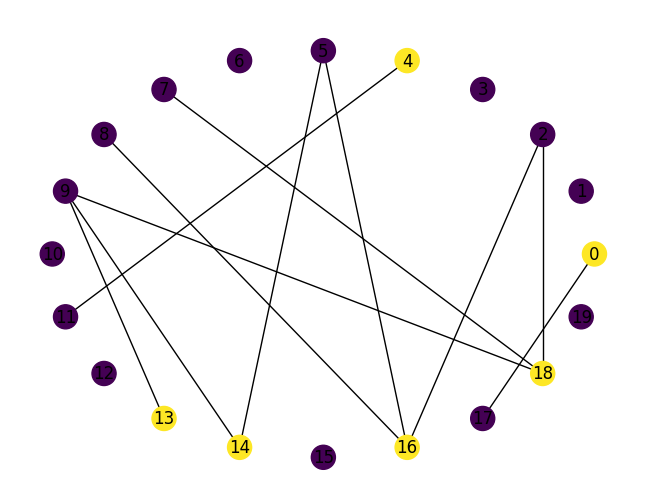

In [90]:
#TODO

n=10
G=nx.algorithms.bipartite.generators.random_graph(n,n,.2)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(2*n),node_color=C,with_labels=True,pos=nx.circular_layout(G))

n =  4 
ok =  85.05 %

n =  6 
ok =  57.4 %

n =  8 
ok =  26.900000000000002 %

n =  10 
ok =  13.0 %

n =  12 
ok =  6.9 %

n =  14 
ok =  4.75 %

n =  16 
ok =  3.5000000000000004 %

n =  18 
ok =  4.3999999999999995 %

n =  20 
ok =  2.6 %



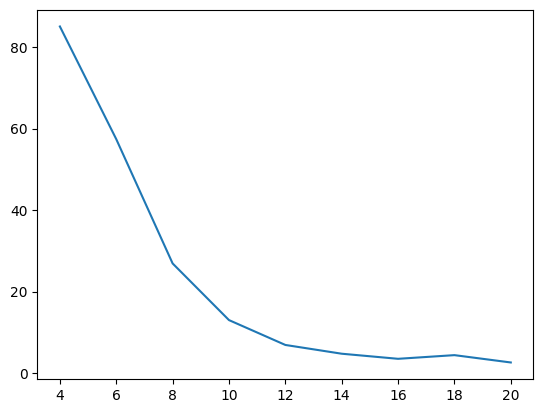

In [81]:
nb_essais = 5000

x = []

y = []

for i in range(4, 21, 2):
    
    ok = 0
    
    x.append(i)
    
    for j in range(nb_essais):
        
        G=nx.algorithms.bipartite.generators.random_graph(i,i,.2)
        
        A=nx.to_numpy_array(G)
        
        C=NaiveCol(A)
        
        if max(C) == 1:
            
            ok += 1
            
    result = (ok/nb_essais)*100
    
    y.append(result)
            
    print("n = ", i, "\nok = ", result,"%\n")
    
    ok = 0
    
plt.plot(y, x)
plt.show()